Tree Decision Model Machine Learning Titanic

In [8]:
import pandas as panda 
import limparDados
from sklearn import tree, model_selection

treinamento = panda.read_csv("train.csv")
teste = panda.read_csv("test.csv")

#Adicionando dados aos campos vazios
limparDados.limpar_dados(treinamento)
limparDados.limpar_dados(teste)
print("\n Extraindo alvo e caracteristicas dos dados")


 Extraindo alvo e caracteristicas dos dados


In [9]:
alvo = treinamento["Survived"].values
#Escolhendo os features baseado na vizualização dos dados
nomes_feat = ["Pclass", "Age", "Fare", "Embarked", "Sex", "SibSp", "Parch"]
feat = treinamento[nomes_feat].values

#Construindo a arvore de decisões
arvore_decisao = tree.DecisionTreeClassifier(random_state=1)
arvore_decisao = arvore_decisao.fit(feat, alvo)
print(arvore_decisao.score(feat, alvo))

print("\n Realizando previsao no DataSet de Testes")

0.9797979797979798

 Realizando previsao no DataSet de Testes


In [10]:
teste_feat = teste[["Pclass", "Age", "Fare", "Embarked", "Sex", "SibSp", "Parch"]].values
#realizando a previsão de acordo com as features escolhidas
previsao = arvore_decisao.predict(teste_feat)
limparDados.escrever_previsao(previsao, "arvore_decisao.csv")

print("\n Teste realizado")


 Teste realizado


[0.17060767 0.12783353 0.15175864 0.01001273 0.47976487 0.05205183
 0.00797074]
0.8787878787878788


[Text(140.10652173913044, 203.85, 'Sex <= 0.5\nentropy = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(47.61195652173913, 176.67000000000002, 'Age <= 6.5\nentropy = 0.306\nsamples = 577\nvalue = [468, 109]'),
 Text(9.704347826086957, 149.49, 'SibSp <= 2.5\nentropy = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(4.852173913043479, 122.31, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(14.556521739130435, 122.31, 'Age <= 2.5\nentropy = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(9.704347826086957, 95.13, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(19.408695652173915, 95.13, 'Fare <= 31.331\nentropy = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(14.556521739130435, 67.94999999999999, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(24.260869565217394, 67.94999999999999, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(85.51956521739132, 149.49, 'Pclass <= 1.5\nentropy = 0.28\nsamples = 553\nvalue = [460, 93]'),
 Text(46.095652173913045, 122.31, 'Fare <= 26.144\

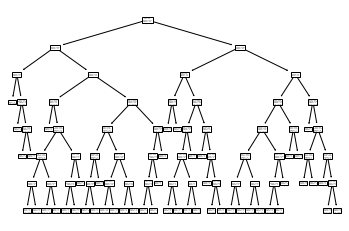

In [11]:
#Separando features para segundo treinamento com profundidade máxima na árvore
feat_dois = treinamento[nomes_feat].values
arvore_decisao_dois = tree.DecisionTreeClassifier(
    max_depth = 7,
    random_state = 1
)

arvore_decisao_dois = arvore_decisao_dois.fit(feat_dois, alvo)
print(arvore_decisao_dois.feature_importances_)
print(arvore_decisao_dois.score(feat_dois, alvo))
tree.plot_tree(arvore_decisao_dois, feature_names=nomes_feat)


In [12]:
#validação cruzada para checar a precisão do modelo
scores = model_selection.cross_val_score(arvore_decisao_dois,feat_dois, alvo, scoring='f1', cv=10)
print(scores)
print(scores.mean())

[0.625      0.78688525 0.61016949 0.83333333 0.82539683 0.72131148
 0.72413793 0.62068966 0.8        0.82352941]
0.7370453369538661


In [13]:
print("\n Nova previsão")

teste_feat_dois = teste[["Pclass", "Age", "Fare", "Embarked", "Sex", "SibSp", "Parch"]].values
#realizando nova precisão baseada na segunda árvore de decisões e salvando e .csv
previsao_dois = arvore_decisao_dois.predict(teste_feat_dois)
limparDados.escrever_previsao(previsao_dois, "arvore_decisao_dois.csv")


 Nova previsão
